In [1]:
from sklearn import svm
from sklearn.datasets import make_classification 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# Generate synthetic classification data
x, y = make_classification(n_samples=100, n_features=2, n_informative=2,
                          n_redundant=0, random_state=42)

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [3]:
# Linear kernal 
linear_svc = svm.SVC(kernel='linear')
linear_svc.fit(x_train, y_train)
linear_predictions = linear_svc.predict(x_test)
linear_accuracy = accuracy_score(y_test, linear_predictions)
print("Linear kernal Accuracy", linear_accuracy)

# Polynomial kernal 
poly_svc = svm.SVC(kernel='poly', degree=3)
poly_svc.fit(x_train, y_train)
poly_predictions = poly_svc.predict(x_test)
poly_accuracy = accuracy_score(y_test, poly_predictions)
print("Polynomial kernal Accuracy", poly_accuracy)

Linear kernal Accuracy 0.95
Polynomial kernal Accuracy 0.9


In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder
import seaborn as snc

In [6]:
df = pd.read_csv("user-data.csv")
display(df.head(2))
display(df.dtypes)

,user_id,gender,age,estimated_salary,purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0


user_id              int64
gender              object
age                  int64
estimated_salary     int64
purchased            int64
dtype: object

In [7]:
lb = LabelEncoder()

In [25]:
df['gender'] = lb.fit_transform(df['gender'])

In [26]:
# Extracting independent and dependent variables
x = df.iloc[:, [2,3]].values
y = df.iloc[:, 4].values

# Output first five values in both the lists
print(x[:5])
print(y[:5])

[[   19 19000]
 [   35 20000]
 [   26 43000]
 [   27 57000]
 [   19 76000]]
[0 0 0 0 0]


In [27]:
# Splitting the data into training snd test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=11)

In [28]:
std_x = StandardScaler()
x_train = std_x.fit_transform(x_train)
x_test = std_x.fit_transform(x_test)

print("x_train:", x_train[:5], "...")
print("")
print("x_test:", x_test[:5], "...")

x_train: [[-1.10884076 -0.57813283]
 [-0.34205731  0.00446048]
 [ 0.42472615  0.52879446]
 [ 0.42472615  0.93660977]
 [-1.68392834  0.4122758 ]] ...

x_test: [[ 0.          0.30657651]
 [ 1.79113817 -1.11936076]
 [-0.47135215  0.24320152]
 [ 2.07394947 -0.61236084]
 [-1.69686774  0.65513896]] ...


In [30]:
model = svm.SVC(kernel = 'linear', random_state=11)
model.fit(x_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [31]:
# Predicting the testing dataset resuts
y_pred = model.predict(x_test)
print(y_pred[:10], "...")

[0 1 0 1 0 0 0 0 0 1] ...


In [32]:
df = pd.DataFrame(y_test, y_pred)
df.head()

,0
0,0
1,1
0,0
1,1
0,0


In [33]:
# Creating the confusion matrix and heatmap
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[50  3]
 [11 16]]


<Axes: >

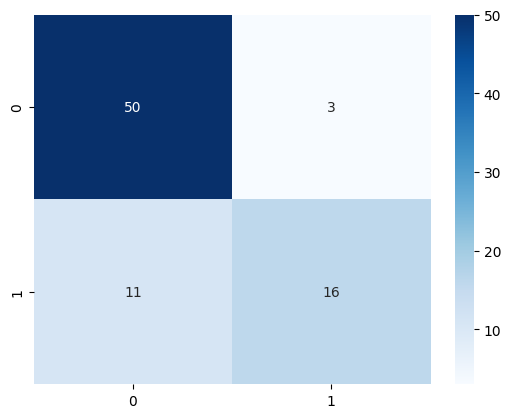

In [35]:
snc.heatmap(cm , annot = True , cmap = 'Blues')

In [36]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.825


In [37]:
x_set, y_set = x_train, y_train

x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01), np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01))

plt.contourf(x1, x2, model.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), alpha = 0.75, cmap = ListedColormap(('orange', 'dodgerblue')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = [ListedColormap(('red', 'white'))(i)], label = j)

plt.title('SVM classifier (Training set)')

plt.xlabel('Age')
plt.ylabel('Estimated Salary')

plt.legend()

plt.show()

TypeError: 'module' object is not callable